In [50]:
#Importar bibliotecas
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import pandas as pd

# Cargar el sheet de Ushuaia.
ushuaia_data = pd.read_excel('D:/Vale/Tecnicatura Cs Ds e Inteligencia Artificial/Aprendizaje Automatico/22_1_01_Agua_Potable_produccion-3.xlsx', sheet_name='Ushuaia', skiprows=2)

# Renombrar las columnas.
columnas = ['Mes/Año', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
ushuaia_data.columns = columnas

# Añadir una columna para la ciudad (así identificamos cada ciudad despues en los graficos).
ushuaia_data['Ciudad'] = 'Ushuaia'

# Identificar la fila 'Total anual' 
total_anual_ushuaia = ushuaia_data[ushuaia_data['Mes/Año'] == 'Total anual']
produccion_media_diaria_ushuaia = ushuaia_data[ushuaia_data['Mes/Año'] == 'Producción media diaria']

# Configurar el formato de display para que no use notación científica (para tener numeros enteros).
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Verificar los datos 
print(ushuaia_data.head(20))

In [ ]:
import pandas as pd

# Cargar el sheet de Río Grande.
rio_grande_data = pd.read_excel('D:/Vale/Tecnicatura Cs Ds e Inteligencia Artificial/Aprendizaje Automatico/22_1_01_Agua_Potable_produccion-3.xlsx', sheet_name='Rio Grande', skiprows=2)

# Renombrar las columnas.
columnas = ['Mes/Año', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
rio_grande_data.columns = columnas

# Añadir una columna para la ciudad (así identificamos cada ciudad despues en los graficos).
rio_grande_data['Ciudad'] = 'Río Grande'

# Identificar la fila 'Total anual' 
total_anual_rio_grande = rio_grande_data[rio_grande_data['Mes/Año'] == 'Total anual']
produccion_media_diaria_rio_grande= rio_grande_data[rio_grande_data['Mes/Año'] == 'Producción media diaria']

# Configurar el formato de display para que no use notación científica (para tener numeros enteros).
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Verificar los datos 
print(rio_grande_data.head(15))

In [ ]:
# Unir los datos de las dos sheets
combined_data = pd.concat([ushuaia_data, rio_grande_data], ignore_index=True)

# Filtrar filas de 'Total anual' y 'Producción media diaria'.
total_anual_combined = combined_data[combined_data['Mes/Año'] == 'Total anual']
produccion_media_diaria_combined = combined_data[combined_data['Mes/Año'] == 'Producción media diaria']

# Verificar que las filas están presentes.
print("Total Anual Combinado:")
print(total_anual_combined)
print("\nProducción Media Diaria Combinada:")
print(produccion_media_diaria_combined)

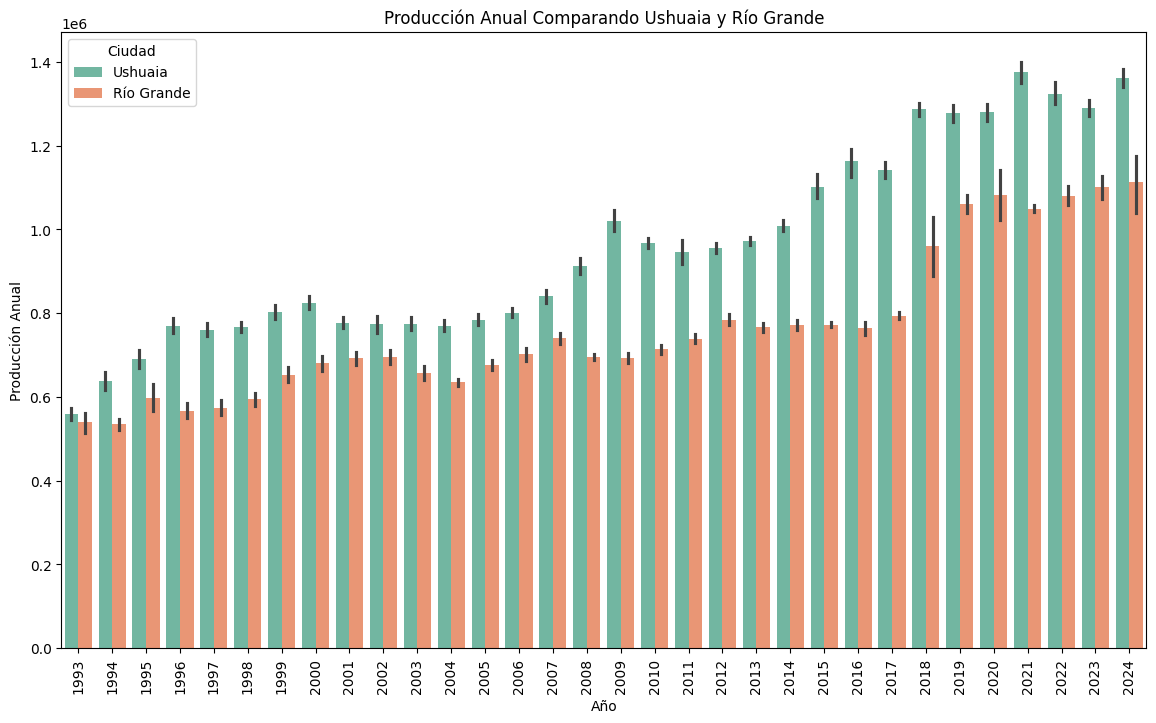

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar los datos por ciudad y año para la producción anual.
prod_anual = combined_data.melt(id_vars=['Mes/Año', 'Ciudad'], var_name='Año', value_name='Producción')
prod_anual = prod_anual[~prod_anual['Mes/Año'].isin(['Total anual', 'Producción media diaria'])]

# Crear un gráfico de barras para la producción anual por ciudad.
plt.figure(figsize=(14, 8))
sns.barplot(data=prod_anual, x='Año', y='Producción', hue='Ciudad', palette='Set2')
plt.title('Producción Anual Comparando Ushuaia y Río Grande')
plt.xlabel('Año')
plt.ylabel('Producción Anual')
plt.xticks(rotation=90)
plt.legend(title='Ciudad')
plt.show()

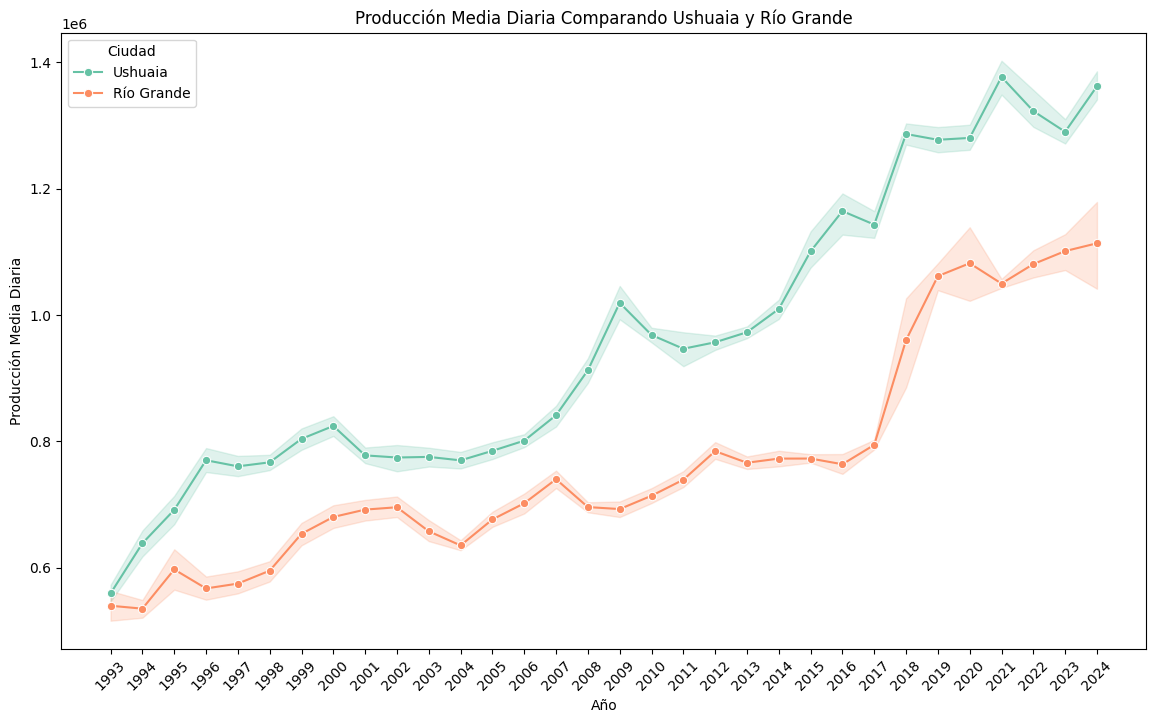

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar los datos por ciudad y año para la producción media diaria.
prod_media = combined_data.melt(id_vars=['Mes/Año', 'Ciudad'], var_name='Año', value_name='Producción Media Diaria')
prod_media = prod_media[~prod_media['Mes/Año'].isin(['Total anual', 'Producción media diaria'])]

plt.figure(figsize=(14, 8))
sns.lineplot(data=prod_media, x='Año', y='Producción Media Diaria', hue='Ciudad', marker='o', palette='Set2')
plt.title('Producción Media Diaria Comparando Ushuaia y Río Grande')
plt.xlabel('Año')
plt.ylabel('Producción Media Diaria')
plt.xticks(rotation=45)
plt.legend(title='Ciudad')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de años para iterar
years = total_anual_combined['Año'].unique()

# Crear gráficos de barras separados para cada año con un tamaño más compacto
for year in years:
    plt.figure(figsize=(6, 4))  # Ajustar el tamaño de la figura
    year_data = total_anual_combined[total_anual_combined['Año'] == year]
    bar_plot = sns.barplot(data=year_data, x='Ciudad', y='Total Anual', hue='Ciudad', palette='Paired', dodge=False, legend=False)
    plt.title(f'Producción Anual en {year}', fontsize=12)  # Ajustar el tamaño de la fuente del título
    plt.xlabel('Ciudad', fontsize=10)  # Ajustar el tamaño de la fuente de las etiquetas del eje x
    plt.ylabel('Producción Anual', fontsize=10)  # Ajustar el tamaño de la fuente de las etiquetas del eje y
    plt.xticks(rotation=45, fontsize=8)  # Ajustar el tamaño y rotación de las etiquetas del eje x
    plt.yticks(fontsize=8)  # Ajustar el tamaño de las etiquetas del eje y

    # Añadir etiquetas a las barras con un tamaño de fuente más pequeño
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='center', 
                          xytext=(0, 6), 
                          textcoords='offset points', 
                          fontsize=8)  # Ajustar el tamaño de la fuente de las etiquetas
    
    plt.tight_layout()  # Optimizar el espaciado
    plt.show()

In [51]:
#Preparacon de los datos combinados.

import pandas as pd

# Cargar los datos combinados de Ushuaia y Río Grande
combined_data = pd.concat([ushuaia_data, rio_grande_data], ignore_index=True)

# Asegurarnos de que la columna 'Año' está en el formato correcto
combined_data['Año'] = combined_data['Año'].astype(int)

# Definir las características y la variable objetivo
X = combined_data[['Año', 'Ciudad']]  # Características
y = combined_data['Producción media diaria']  # Variable objetivo

# Convertir variables categóricas a numéricas
X = pd.get_dummies(X, columns=['Ciudad'], drop_first=True)

# División del conjunto de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: 'Año'

In [ ]:
#Modelo de regresion lineal.

from sklearn.linear_model import LinearRegression

# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

In [ ]:
#Evalucioan del Modelo.

from sklearn.metrics import mean_squared_error, r2_score

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio: {mse}")
print(f"R^2: {r2}")

In [ ]:
#Visualizacion de los resultados.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales y Predicciones')
plt.show()